# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create two new dataframes
North = pd.read_csv("NorthCallCenter.csv")
South = pd.read_csv("SouthCallCenter.csv")

North.sample(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
228,228,North,Product Support,4:00 PM,Outgoing,B,Todd,NO,0,0,9,1,NaN,3,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
20,20,North,Sales Support,11:00 AM,Incoming,B,Lilly,NO,0,0,10,2,2.0,4,1
172,172,North,Product Support,12:00 PM,Outgoing,A,Amanda,NO,0,0,11,2,NaN,4,1
180,180,North,Product Support,1:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,3,1


In [2]:
South.sample(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
177,177,South,Sales Support,12:00 PM,Outgoing,C,Sandy,NO,0,0,9,1,NaN,4,1
101,101,South,Product Support,4:00 PM,Incoming,D,George,NO,0,0,12,3,4.0,3,1
84,84,South,Sales Support,12:00 PM,Incoming,C,Sharon,NO,0,0,12,3,4.0,3,1
195,195,South,Sales Support,1:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,3,1
91,91,South,Product Support,12:00 PM,Incoming,D,Helga,NO,0,0,9,1,4.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [3]:
# Put your EDA code here
#North.value_counts(Rep ID) wrong --> df['your_column'].value_counts() 

#How many reps are in each branch?
#https://re-thought.com/pandas-value_counts/

#North['Rep ID'].value_counts()
#How many times each rep answered something.


len(North['Rep ID'].unique())
#without len will bring up the names of the reps

len(South['Rep ID'].unique())

11

In [35]:
#How many reps are in each branch?
South['Rep ID'].value_counts() 

Eric      35
Randy     33
Sandy     32
Helga     31
George    29
Kate      29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

In [17]:
#What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

North.mean()

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

In [11]:
#What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
#I was trying to show only the four variables, but couldn't. 

#North.loc["Busy Minutes"].mean()

#Calculate the mean of the specific Column in pandas
# mean of the specific column
#df.loc[:,"Score1"].mean()
#from https://www.datasciencemadesimple.com/mean-function-python-pandas-dataframe-row-column-wise-mean/

South.mean()



Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [38]:
#What is the number of calls taken for each time block?
#First calculate the number of time blocks.
North['Time Block'].value_counts() 

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [39]:
South['Time Block'].value_counts() 

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

In [22]:
TotalCallSouth = South['Calls'].value_counts() 
TotalCallSouth

1    314
Name: Calls, dtype: int64

In [21]:
TotalCallNorth = North['Calls'].value_counts() 
TotalCallNorth

1    245
Name: Calls, dtype: int64

In [49]:
# this didn't work: 
#North['Time Block'].sum() 

North['Time Block'].count() 
#to tally, or get the total count of al the times, and make sure they are the same as the #of calls in each center

245

In [50]:
South['Time Block'].count() 

314

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [ ]:
#1. North has 9 reps and South has 11 reps.

#2. North==> average busy minutes (9.99), not ready minutes (1.91), incoming wait time (3.05), 
# and during call wait time (2.97).
#South==> average busy minutes (10.05), not ready minutes (1.91), incoming wait time (3.00), 
# and during call wait time (3.08).

#3. North:
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
    
# South:
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [73]:
# Clean your data here

#This didn't help: North.isnull()
North[['Incoming or Outgoing','Incoming Wait Time']]


,Incoming or Outgoing,Incoming Wait Time
0,Incoming,1.0
1,Incoming,1.0
2,Incoming,1.0
3,Incoming,1.0
4,Incoming,1.0
...,...,...
240,Outgoing,NaN
241,Outgoing,NaN
242,Outgoing,NaN
243,Outgoing,NaN


In [76]:
values = {"Incoming Wait Time": 0}
North.fillna(value=values, inplace=True)
#this won't save. You need to use "T/F" part to save it.

In [82]:
North[North["Sale"]=="YES"]
#He did this to show all the yes's in  the sale column.

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
40,40,North,Sales Support,12:00 PM,Incoming,B,Lilly,YES,0,0,10,1,3.0,2,1
47,47,North,Sales Support,10:00 AM,Incoming,A,Amanda,YES,0,0,10,3,4.0,3,1
67,67,North,Sales Support,12:00 PM,Incoming,B,Todd,YES,0,0,9,3,5.0,4,1
69,69,North,Sales Support,12:00 PM,Incoming,A,Andy,YES,0,0,10,1,5.0,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,0.0,4,1
87,87,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,12,1,0.0,4,1
99,99,North,Sales Support,10:00 AM,Outgoing,A,Andy,YES,0,0,12,2,0.0,2,1
108,108,North,Sales Support,11:00 AM,Outgoing,B,Lilly,YES,0,0,8,3,0.0,2,1
220,220,North,Product Support,4:00 PM,Outgoing,A,Cam,YES,0,0,8,1,0.0,3,1
227,227,North,Product Support,4:00 PM,Outgoing,B,Brent,YES,0,0,10,2,0.0,4,1


In [84]:
#looking for duplicates
North[North.duplicated()]
#results: no duplicates here

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [85]:
South[South.duplicated()]
#results: no duplicates in South

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [199]:
North.columns
#how to see the names of all the columns to copy them

#getting rid of the first column
##      North = North.drop('Unnamed: 0', 1)

##      South = South.drop('Unnamed: 0', 1)

#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
#df.drop('column_name', axis=1, inplace=True)
#df = df.drop('column_name', 1)

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [91]:
North[North.duplicated()]
#ignoring this. Joe and Amanda are separate

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
50,North,Sales Support,12:00 PM,Incoming,A,Joe,NO,0,0,10,1,4.0,3,1
105,North,Sales Support,10:00 AM,Outgoing,A,Amanda,NO,0,0,11,2,0.0,2,1




## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [13]:
frames = [North, South]

df = pd.concat(frames)

#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#combine two datasets

#naming: do better! Explain what they are.

In [14]:
#Group by Rep ID and sum the resulting structure. Sort by calls.
df1 = df.groupby("Rep ID").sum()
df1.sort_values(by=['Calls'], ascending=False, inplace=True)
df1

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
Lilly,3375,0,2,307,59,37.0,88,30
Todd,4252,1,0,296,58,21.0,97,29
Duke,2999,2,0,292,56,39.0,85,29
George,4620,0,0,298,53,41.0,87,29


In [15]:
#I want to see top performers per center.
North1 = North.groupby("Rep ID").sum()
North1.sort_values(by=['Calls'], ascending=False, inplace=True)
North1

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Lilly,3375,0,2,307,59,37.0,88,30
Duke,2999,2,0,292,56,39.0,85,29
Todd,4252,1,0,296,58,21.0,97,29
Joe,3178,0,0,256,49,36.0,81,26
Cam,2746,1,0,233,46,32.0,66,24
Xander,3340,1,0,244,44,20.0,68,24
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23


In [16]:
South1 = South.groupby("Rep ID").sum()
South1.sort_values(by=['Calls'], ascending=False, inplace=True)
South1

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Karl,4532,1,0,287,61,26.0,85,28
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26


In [18]:
len(df1)
#how to tally the number of reps

#df1.shape()
#columns and rows - just can't run it bc it's a tuple

20

In [20]:
round(North["Abandoned"].mean()*100, 2)
#round (thing, 2) 
#0 would round it into 3/whole number. 

2.86

In [128]:
South["Abandoned"].mean()*100

1.2738853503184715

In [135]:
#average call abandonment rate is a KPPI 
#abandoned calls = customer hangs up due to long call times.
#average abandonment rate: N? S? df?
#AAR within optimal range of 2-5%?

df["Abandoned"].mean()*100

#Result: South Center is great! North and Overall within optimal range.

1.9677996422182469

In [24]:
#service level = %calls answered within a specific number of seconds
#What is the % of calls answered within 2sec for each branch and entire company



len(North[North["Incoming Wait Time"] < 2]) / 245

#anytime you want to do something in a column, use this: df[df["column"] whatever you are looking for]
#df[df["column"] == Yes] to see if it's there
#df[df["column"] <2] to see if it's less than 2
#use len to see how many entries there are

#245 is hardcoding/using magic number. Don't let appear out of nowhere. Give context if can't avoid it.

0.06938775510204082

In [23]:
len(North[North["Incoming Wait Time"] < 2]) / TotalCallNorth

#Created TotalCallNorth as a variable. To use again.

1    0.069388
Name: Calls, dtype: float64

In [25]:
len(South[South["Incoming Wait Time"] < 2]) /TotalCallSouth

1    0.063694
Name: Calls, dtype: float64

In [146]:
len(South[South["Incoming Wait Time"] < 2]) /314

0.06369426751592357

In [144]:
len(df[df["Incoming Wait Time"] < 2]) / 559

0.35778175313059035

In [137]:
#What is the average speed of answer? N?S?df?

North["Incoming Wait Time"].mean()


1.0204081632653061

In [138]:
South["Incoming Wait Time"].mean()

3.0

In [139]:
df["Incoming Wait Time"].mean()

1.692722371967655

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [158]:
df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [162]:
#1. What is the average abandonment rate per queue?
#There are four types of this variable, we want to see how many calls fall into each category.
#We are looking for a dict, those four are the keys we get with groupby, what we are looking for are the values.

df.groupby("Queue").agg("sum")

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,
A,1,4,946,181,116.0,272,96
B,4,3,1501,288,134.0,455,149
C,4,1,1409,251,160.0,435,138
D,7,3,1748,349,218.0,531,176


In [28]:
# The dictionary abandonment_rates has the data you need.
#save this code for loop/dict/agg piece of art.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

print(abandonment_rates)

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


In [30]:
#just get keys to label the columns, use the values to determine where the bar goes up to
abandonment_rates.keys()
abandonment_rates.values()

dict_values([0.041666666666666664, 0.020134228187919462, 0.007246376811594203, 0.017045454545454544])

<BarContainer object of 4 artists>

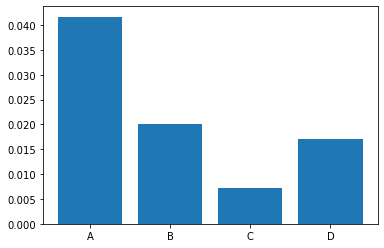

In [35]:
#visualization 1
# I would plot the four points on a single line.
#I would include the definition of what abandonment rate is (the fact that the lowest is the best.)

#C (0.007) < D (0.017) < B (0.020) < A (0.042)



#create a barchart and insert here
plt.bar(abandonment_rates.keys(), abandonment_rates.values())

#add headers and title

ValueError: shape mismatch: objects cannot be broadcast to a single shape

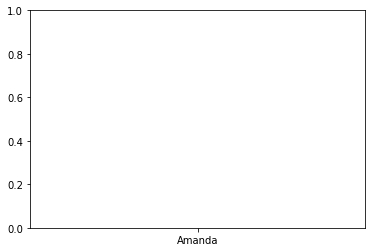

In [43]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = North.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()




# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = North[North["Incoming Wait Time"] <= 2.0] #you get 196 rows
quick_reps = quick_calls[["Rep ID", "Calls"]] #narrowed down / filtered to two columns: Rep ID and Calls
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table: all the quick calls grouped by 9 fast reps

quick_stats

#groupby column turned into index 
quick_stats.index


plt.bar(quick_stats.index, quick_reps['Calls'])



<BarContainer object of 9 artists>

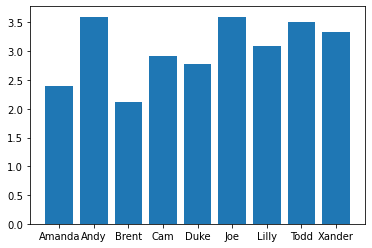

In [62]:
plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])
#average incoming weight time by rep (from Lea) = Q2

In [61]:
# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = South[South["Incoming Wait Time"] <= 2.0] #you get 47 rows

quick_reps = quick_calls[["Rep ID", "Calls"]] #narrowed down / filtered to two columns: Rep ID and Calls
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table: all the quick calls grouped by 11 reps

quick_stats

,Calls
Rep ID,
Alice,3
Eric,10
George,4
Helga,3
Josh,2
Karl,3
Kate,3
Randy,7
Sandy,7


In [60]:
# Table 2: Total Incoming Calls Only grouped by Rep

total_calls_in = North[North["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

total_stats

,Calls
Rep ID,
Amanda,5
Andy,10
Brent,8
Cam,11
Duke,14
Joe,10
Lilly,12
Todd,6
Xander,6


In [59]:
# Table 2: Total Incoming Calls Only grouped by Rep

total_calls_in = South[South["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

,Calls
Rep ID,
Alice,6
Eric,18
George,13
Helga,11
Josh,9
Karl,9
Kate,11
Randy,16
Sandy,13


In [52]:
North['Call Purpose'].value_counts()

#I am sure there is a neater way to do this.
#I want to see if there is a visible difference in wait times for different purpose calls.
#I know there are three types.

#How do I get these to show up in one table?
#I tried this too:
#North2 = North.groupby("Rep ID").sum()
#North2.sort_values(by=['Call Purpose'], ascending=False, inplace=True)
#North2

Product Support    145
Sales Support       85
Complaint           15
Name: Call Purpose, dtype: int64

In [51]:
#Product support -- rep and incoming wait time

PS_calls = North[North["Call Purpose"] == "Product Support"]
rep_calls = PS_calls[["Rep ID", "Incoming Wait Time"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

,Incoming Wait Time
Rep ID,
Amanda,5.0
Andy,15.0
Brent,6.0
Cam,14.0
Duke,14.0
Joe,11.0
Lilly,15.0
Todd,6.0
Xander,12.0


In [50]:
#sales support
SS_calls = North[North["Call Purpose"] == "Sales Support"]
rep_calls = SS_calls[["Rep ID", "Incoming Wait Time"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

,Incoming Wait Time
Rep ID,
Amanda,7.0
Andy,19.0
Brent,8.0
Cam,4.0
Duke,23.0
Joe,16.0
Lilly,13.0
Todd,15.0
Xander,4.0


In [47]:
#Complaint
C_calls = North[North["Call Purpose"] == "Complaint"]
rep_calls = C_calls[["Rep ID", "Incoming Wait Time"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
total_stats

,Incoming Wait Time
Rep ID,
Andy,2.0
Brent,3.0
Cam,14.0
Duke,2.0
Joe,9.0
Lilly,9.0
Xander,4.0


In [57]:
#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

service_level
# x is their service level per rep score. 
#Y is the incoming calls rate.



,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143
Joe,2,10,20.000000
Lilly,4,12,33.333333
Todd,2,6,33.333333
Xander,2,6,33.333333


<AxesSubplot:xlabel='Rep ID'>

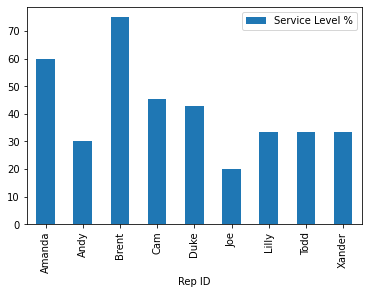

In [66]:
service_level.plot(y= "Service Level %", kind= "bar")
#service level by rep data vis

In [ ]:
#vis 2
#How I show this depends on the stakeholder I am showing it to and the purpose of the visualization.
#One way to show this is to add a bit more context. For example, for Amanda's "21", I would display 
#a percentage (21 fast out of 23 total) will be more meaningful. The same goes for her "5". 

#The visualization would have two parts: one double bar chart with each rep at the bottom and the two percentages
#explained coming out of their names in different colors. The other chart will simply have a name and a number in 
#descending order, showing the rankings and service levels. I would also draw a line across it to show where the average is.


In [181]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#not sure what is going on here.It seems everything lined up depends on having purpose_group defined already.
#I do understand the question.

NameError: name 'purpose_group' is not defined

In [ ]:
#vis 3



### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [206]:
#Using KPIs such as average abandonment rate, service level and average speed of answer, 
#which one of the two branches is operating more efficiently? Why?



#South's abandonment rate is much lower (less than half of North's). 
#The South takes slightly more calls on average (28.5 compared to 27.2).

#North's speed is three times faster than the South's. 
#The North's service level is 12 times more than the South.


#==> North is operating more efficiently. In addition to their overall stats, the North branch
#has three fast reps: Brent, Amanda, and Todd. These are valuable assets.
#I would send the new reps to the North branch, have these three reps train them, 
#then send them to the South branch: both to help their status, and to inject some efficiency habits into their culture.



# F questions:
#Do incoming calls take much longer than outgoing? How are the incoming and outgoing calls designated among reps?
#Which calls are the reps most hated? Favorite?
#Is there a trend/relationship between the purpose of the call and the abandonment rate?
#How are employees motivated to speed up? What do their trainings involve?




## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
